Test and debug functions from spikingDataUtilities

In [ ]:
import numpy as np
import spikingDataUtilities as su
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# test restrict

# first column of samples is assumed to be time stamps at which all other columns are evaluated
samples = np.array([[1.1,5],[3,8],[4,-1.5],[7,2]])
# every row of intervals is an interval, sample time stamps must fall in at least one interval
intervals = [[1,3.2],[6,8]]
su.restrict(samples,intervals,s_ind=True)

(array([[1.1, 5. ],
        [3. , 8. ],
        [7. , 2. ]]),
 array([ True,  True, False,  True]))

In [4]:
# test consolidateIntervals
intervals = [[1,3.2],[6,8],[2,4],[9,11],[10,11],[11.1,12.1],[11.6,11.8]]
su.consolidateIntervals(intervals)

array([[ 1. ,  4. ],
       [ 6. ,  8. ],
       [ 9. , 11. ],
       [11.1, 12.1]])

In [23]:
# test intersectIntervals
intervals1 = [[1,4],[9,11],[5,5.5],[6,8],[11.1,11.8],[12,12.5]]
intervals2 = [[2,5],[5.5,5.8],[6,7],[8.5,11.5],[14,16]]
intervals3 = [[2,3],[5,7.5],[8.1,11]]
intervals4 = [[2,12],[15,17.5]]
su.intersectIntervals((intervals1,intervals2,intervals3,intervals4))

array([[ 2.,  3.],
       [ 6.,  7.],
       [ 9., 11.]])

[autoreload of spikingDataUtilities failed: Traceback (most recent call last):
  File "c:\Users\thebo\anaconda3\envs\brainhack\Lib\site-packages\IPython\extensions\autoreload.py", line 325, in check
    superreload(m, reload, self.old_objects)
    ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\thebo\anaconda3\envs\brainhack\Lib\site-packages\IPython\extensions\autoreload.py", line 580, in superreload
    module = reload(module)
  File "c:\Users\thebo\anaconda3\envs\brainhack\Lib\importlib\__init__.py", line 129, in reload
    _bootstrap._exec(spec, module)
    ~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 869, in _exec
  File "<frozen importlib._bootstrap_external>", line 759, in exec_module
  File "<frozen importlib._bootstrap>", line 491, in _call_with_frames_removed
  File "c:\Users\thebo\Documents\INS\BrainHack2026\CrossRegionCommunicationBH26\Code\spikingDataUtilities.py", line 9, in <module>
    from scipy.signal import gaussian_filter
Imp

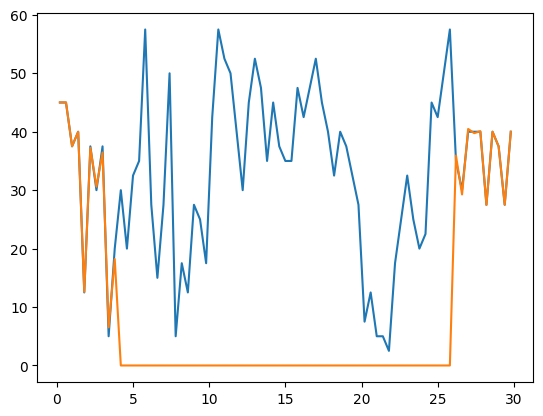

In [16]:
# test firingRate
data = su.loadMATData('../Data/session1.mat')
spikes = data['spikes_hpc']
y1 = su.firingRate(spikes,0,30,0.4)
y2 = su.firingRate(spikes,0,30,0.4,smooth=20)

plt.plot(y1[:,0],y1[:,3])
plt.plot(y1[:,0],y2[:,3])